In [184]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import os
import sklearn.model_selection as model_selection
from scipy import stats


from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model
from sklearn.preprocessing import OneHotEncoder

In [161]:
df = pd.read_csv (r"/Users/angelinatham/Desktop/okcupid.csv")
print (df)

       age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          education  \
0        socially   

In [162]:
y = df.sex
X = df.age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [163]:
print(f"No. of training examples: {X.shape[0]}")

No. of training examples: 59946


In [164]:
print(f"No. of testing examples: {y.shape[0]}")

No. of testing examples: 59946


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [166]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [167]:
#this dataset is very clean already, values are null if they are not included, except for income. if income is not reported then it is -1. i'm not using income in this project, so i think i will leave it as is.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>]],
      dtype=object)

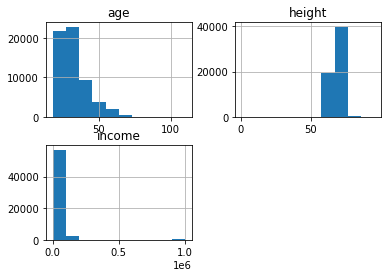

In [168]:
df.hist()

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='height', ylabel='age'>,
        <AxesSubplot:xlabel='income', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='income', ylabel='height'>],
       [<AxesSubplot:xlabel='age', ylabel='income'>,
        <AxesSubplot:xlabel='height', ylabel='income'>,
        <AxesSubplot:xlabel='income', ylabel='income'>]], dtype=object)

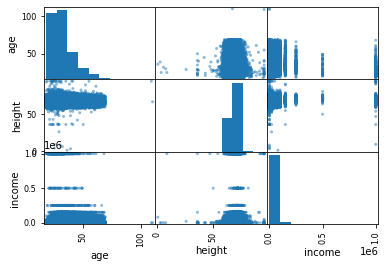

In [169]:
pd.plotting.scatter_matrix(df)

<AxesSubplot:>

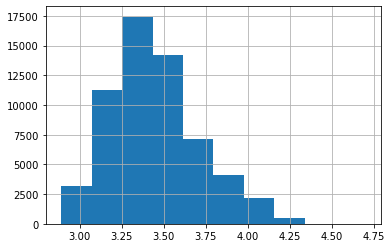

In [170]:
df["age"].apply(np.log).hist()

In [171]:
#the only quantitative variables in this dataset are age, income, and height. it doesn't really make sense to transform the data because it ruins the X axis? as shown above by using a log scale for age. it makes sense to try to make it more of a bell shape for age, but the data will always be skewed since people less than 50 are rarely using OKCupid.

<AxesSubplot:>

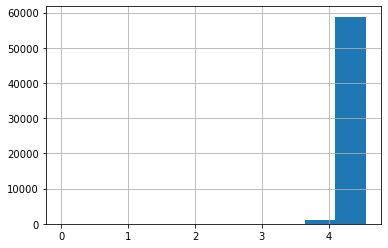

In [183]:
df["height"].apply(np.log).hist()

In [173]:
#don't know what this means? heights are recorded in inches. so for me, i'm 5'4 so i'm 65 inches. what does the x axis of 4 mean

In [174]:
pd.cut(df.age, bins = 4).value_counts()


(17.908, 41.0]    50597
(41.0, 64.0]       8977
(64.0, 87.0]        370
(87.0, 110.0]         2
Name: age, dtype: int64

In [175]:
#most people are under 41, the majority of people are 18 - 41

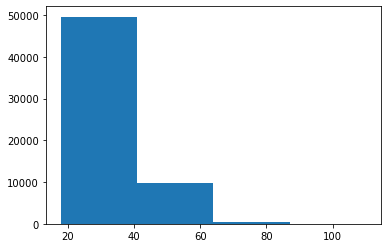

In [176]:
bins = [18,41,64,87,110]
plt.hist(df.age, bins=bins)
plt.show()

In [177]:
#the other charts were bad so I remade it. looks like i should do 3 neighbors for KNN

ValueError: could not convert string to float: 'm'

ValueError: could not convert string to float: 'm'